## **Stroke Risk Analysis:** Insights from Patient Health Data

### Description:
#### A healthcare provider aims to improve patient care by early identification of individuals at high risk of stroke. The goal is to use historical    patient data (like age, hypertension, heart disease, BMI, etc.) to:

##### Predict stroke risk among patients.
##### Identify key risk factors contributing to strokes.
##### Visualize stroke risk patterns across demographics (age, gender, smoking status).
##### Support decision-making with interactive and insightful dashboards using Power BI.

### Using Python:
##### Data Cleaning & Preprocessing (with Pandas, NumPy).
##### Exploratory Data Analysis (EDA) using Seaborn and Matplotlib.

### Enviromental Setup

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.simplefilter("ignore")

### Data Loading

In [3]:
# Load the Dataset: Read the data into a pandas DataFrame

df = pd.read_csv("stroke.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


## Data Understanding

In [3]:
# df.shape returns the dimensions of a DataFrame as a tuple: (number of rows, number of columns).
# It's useful to quickly check the size of your dataset before and after data cleaning or transformation.

df.shape

(43400, 12)

In [4]:
# df.size gives the total number of data elements in the DataFrame (rows × columns).

df.size

520800

In [5]:
# df.head() displays the first 5 rows of a DataFrame by default.
# It's commonly used to get a quick overview of the dataset’s structure and sample data.

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [6]:
# df.info() provides a summary of the DataFrame, including column names, data types, non-null counts, and memory usage.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [7]:
# Returns the data type of each column in the DataFrame
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:
# It returns a list of all column names in the DataFrame.
df.columns.tolist()

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [9]:
# df.describe() returns summary statistics of numeric columns in the DataFrame, including:
# count, mean, std, min, 25%, 50% (median), 75%, and max.
# It helps in quickly understanding the distribution and spread of our data.

df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


###  Data Exploration

### ID

In [10]:
df["id"].unique()

array([30669, 30468, 16523, ..., 28375, 27973, 36271], dtype=int64)

### Gender

In [11]:
df["gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [12]:
df["gender"].value_counts()

gender
Female    25665
Male      17724
Other        11
Name: count, dtype: int64

#### Observations: The dataset is female-dominated, with 59.1% females and 40.8% males, while the "Other" gender category has only 11 individuals (0.03%). This imbalance may influence gender-related analysis, and the very small "Other" group is not sufficient for reliable statistical inference. Care is needed when analyzing or modeling gender-related patterns.


### hypertension

In [13]:
df["hypertension"].unique()

array([0, 1], dtype=int64)

In [14]:
df["hypertension"].value_counts()

hypertension
0    39339
1     4061
Name: count, dtype: int64

In [15]:
df["hypertension"].unique()

array([0, 1], dtype=int64)

In [16]:
df["hypertension"].value_counts()

hypertension
0    39339
1     4061
Name: count, dtype: int64

#### 
The majority of individuals, 39,339 (90.6%), are labeled as "No", indicating they do not have hypertension.A smaller portion, 4,061 (9.4%), are labeled as "Yes", indicating they do have hypertension.

### hesrt_disease

In [ ]:
df["heart_disease"].unique()

In [ ]:
df["heart_disease"].value_counts()

##### 
Observations: Heart disease is a categorical feature with two values: "No" (no heart disease) and "Yes" (has heart disease). The majority of individuals, 41,338 (95.3%), are labeled as "No", indicating they do not have heart disease. A smaller group, 2,062 (4.7%), are labeled as "Yes", indicating they have heart disease. This suggests that heart disease is relatively rare in this dataset.

### ever_married

In [ ]:
df["ever_married"].unique()

In [ ]:
df["ever_married"].value_counts()

##### 
Observations: The majority of individuals in the dataset have been married at some point, with 27,938 (64.4%) responding "Yes" to ever_married, while 15,462 (35.6%) have never been married. This suggests that most of the population is or has been in a marital relationship, which could be an important factor when analyzing health conditions.

### work_type

In [ ]:
df["work_type"].unique()

In [ ]:
df["work_type"].value_counts()

##### 
Observations: The majority of individuals work in the private sector (57.2%), followed by self-employed (15.6%) and government jobs (12.5%). Children make up 14.2% of the dataset, while a very small group (0.4%) has never worked. This indicates a workforce primarily engaged in private and self-employment, with minimal representation from non-working individuals.

##### Residence_type

In [ ]:
df["Residence_type"].unique()

In [ ]:
df["Residence_type"].value_counts()

##### 
Observations: The dataset has a nearly equal distribution of residence types, with 50.1% urban and 49.9% rural. This balance allows for fair comparison and analysis between urban and rural populations.

### avg_glucose_level

In [ ]:
df["avg_glucose_level"].unique()

In [ ]:
df["avg_glucose_level"].value_counts()

In [ ]:
# visualizing the distribution of avg_glucose_level.
plt.figure(figsize =(10,8))
sns.histplot(df['avg_glucose_level'], bins=50, kde=True, edgecolor='black')
plt.title('Distribution of avg_glucose_level')
plt.xlabel('avg_glucose_level')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Box Plot to identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['avg_glucose_level'])
plt.title('Box Plot of Average Glucose Level')
plt.ylabel('Average Glucose Level')
plt.show()

#####
Outliers in avg_glucose_level are high values, likely indicating diabetes or pre-diabetes. These are crucial data points as elevated glucose is a significant stroke risk factor

In [ ]:
df["avg_glucose_level"].describe()

### bmi

In [46]:
df["bmi"].unique()

array([18. , 39.2, 17.6, 35.9, 19.1, 50.1, 17.7, 27. , 32.3, 54.6, 35. ,
       22. , 39.4, 26.1, 42.4, 33. , 19.7, 22.5, 24.6, 25.2, 41.8, 60.9,
       31.5, 27.3, 23.7, 24.5, 28.4, 26.9, 26.7, 31.2, 25. , 25.4, 27.5,
       16. , 31.6, 25.1, 30.9, 24.8, 23.4, 29.4, 18.3, 20. , 19.5, 36. ,
       27.7, 28.5, 26.8, 33.6, 29.1, 34.9, 35.3, 26.4, 40.1, 43.1, 36.7,
       29.3, 21.2, 36.6, 21.4, 27.9, 34.3, 31. , 38.7, 27.6, 16.5, 22.8,
       35.4, 24.3, 25.7, 21.9,  0. , 38.4, 30.5, 25.9, 54.7, 29.9, 18.6,
       27.1, 24.9, 19.4, 29. , 48.2, 34.6, 25.8, 27.2, 20.7, 30. , 37.3,
       34.1, 23.6, 39.5, 23.5, 23.3, 64.8, 28.1, 24.4, 29.8, 35.1, 43.6,
       21. , 47.3, 16.6, 37.5, 24.2, 21.6, 31.1, 15.5, 20.5, 35.6, 16.7,
       41.9, 16.4, 17.1, 29.2, 37.9, 32.5, 44.6, 33.2, 22.3, 39.6, 37.8,
       40.3, 41.5, 41.6, 23.8, 39. , 23.2, 18.9, 36.1, 36.3, 40.5, 46.5,
       16.8, 46.6, 26.2, 35.2, 20.9, 36.8, 34.4, 22.2, 13.8, 31.7, 34.2,
       36.9, 31.9, 31.8, 29.5, 28.8, 28.9, 15.3, 37

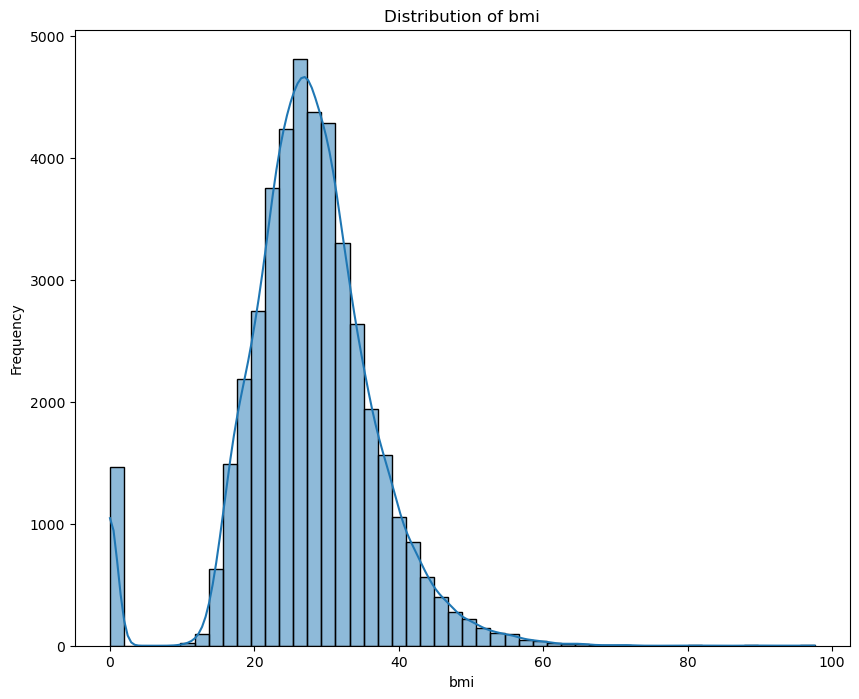

In [47]:
# visualize the distribution of bmi using histplot

plt.figure(figsize =(10,8))
sns.histplot(df['bmi'], bins=50, kde=True, edgecolor='black')
plt.title('Distribution of bmi')
plt.xlabel('bmi')
plt.ylabel('Frequency')
plt.show()

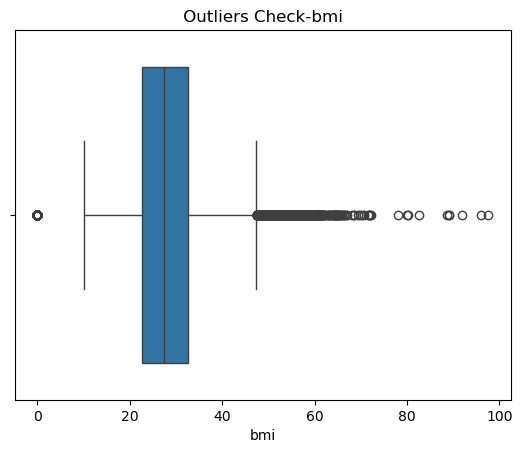

In [48]:
# checking the outliers of bmi
sns.boxplot(data=df, x='bmi')
plt.title(" Outliers Check-bmi ")
plt.show()

### smoking_status

In [49]:
df["smoking_status"].unique()

array(['never smoked', 'formerly smoked', 'smokes'], dtype=object)

In [50]:
df["smoking_status"].value_counts()

smoking_status
never smoked       29345
formerly smoked     7493
smokes              6562
Name: count, dtype: int64

#####
Observations:  The majority of individuals in the dataset have never smoked (16,053), followed by those who formerly smoked (7,493), and current smokers (6,562). This indicates that about 37% have a history of smoking (past or present), which is important for analyzing risk factors related to health conditions. Missing values in this column should be addressed before detailed analysis.

#### stroke

In [51]:
df["stroke"].unique()

array(['No', 'Yes'], dtype=object)

In [52]:
df["stroke"].value_counts()

stroke
No     42617
Yes      783
Name: count, dtype: int64

### Data Cleaning

In [53]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_months', 'glucose_level_category',
       'health_risk', 'age_group', 'stroke_binary'],
      dtype='object')

In [20]:
# to check the duplicated record
df.duplicated().sum()

0

In [21]:
df['age'] = df['age'].round().astype(int)

In [22]:
df['hypertension'] = df['hypertension'].replace({0: 'No', 1: 'Yes'})

In [23]:
df['heart_disease'] = df['heart_disease'].replace({0: 'No', 1: 'Yes'})

<Axes: xlabel='avg_glucose_level'>

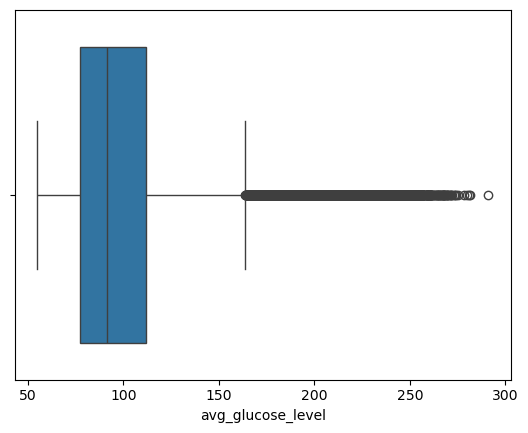

In [24]:
sns.boxplot(data= df, x = "avg_glucose_level")

In [25]:
# For data analysis will use log transformation to handle the outliers
df['log_glucose'] = np.log1p(df['avg_glucose_level'])

<Axes: xlabel='log_glucose'>

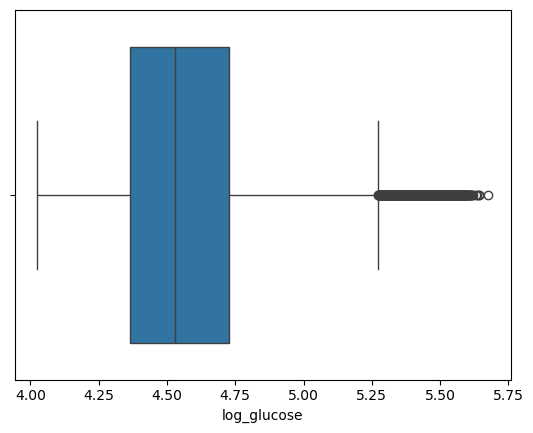

In [26]:
sns.boxplot(data= df, x = "log_glucose")

In [54]:
Q1 = df['avg_glucose_level'].quantile(0.25)
Q3 = df['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['avg_glucose_level'] = df['avg_glucose_level'].clip(lower=lower_bound, upper=upper_bound)

In [55]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['bmi'] = df['bmi'].clip(lower=lower_bound, upper=upper_bound)

In [56]:
df['bmi'] = df['bmi'].fillna(0)  # or any default value

In [38]:
df["smoking_status"] = df["smoking_status"].fillna (df["smoking_status"]. mode() [0])

In [39]:
df['stroke'] = df['stroke'].replace({0: 'No', 1: 'Yes'})

In [40]:
df['stroke_binary'] = df['stroke'].replace({ 'No': 0, 'Yes': 1})

In [33]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'log_glucose', 'stroke_binary'],
      dtype='object')

### Feature Engineering

In [8]:
df['age_months'] = (df['age'] * 12).round().astype(int)

##### 
This line creates a new column age_months by converting each person's age from years to months, rounding it, and storing it as an integer.

In [9]:
# Define bin edges (in mg/dL) and labels
bins = [0, 70, 99, 125, float('inf')]  # adjust ranges as needed
labels = ['Low', 'Normal', 'High', 'Very High']

# Create a new column with the binned categories
df['glucose_level_category'] = pd.cut(df['avg_glucose_level'], bins=bins, labels=labels)

# Check the value counts for each category
print(df['glucose_level_category'].value_counts())

glucose_level_category
Normal       20338
High          9008
Very High     7872
Low           6182
Name: count, dtype: int64


In [10]:
def assess_risk(row):
    risk_score = 0

    if row['age'] >= 60:
        risk_score += 1
    if row['hypertension'] == 1:
        risk_score += 1
    if row['heart_disease'] == 1:
        risk_score += 1
    if row['avg_glucose_level'] >= 140:
        risk_score += 1
    if pd.notna(row['bmi']) and row['bmi'] >= 30:
        risk_score += 1

    if risk_score >= 3:
        return 'High'
    elif risk_score == 2:
        return 'Medium'
    else:
        return 'Low'

df['health_risk'] = df.apply(assess_risk, axis=1)


In [11]:
# add age_group column using age column

def categorize_age(age):
    if age < 18:
        return 'Child'
    elif age <= 60:
        return 'Adult'
    else:
        return 'Senior'

# Create the new column
df['age_group'] = df['age'].apply(categorize_age)
print(df['age_group'])

0         Child
1         Adult
2         Child
3        Senior
4         Child
          ...  
43395     Child
43396     Adult
43397    Senior
43398     Adult
43399    Senior
Name: age_group, Length: 43400, dtype: object


In [12]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_months', 'glucose_level_category',
       'health_risk', 'age_group'],
      dtype='object')

In [15]:
# This line saves the DataFrame df to a CSV file named cleaned_dataset.csv without writing the row index as a separate column in the file.
df.to_csv("cleaned_strokedata.csv", index=False)

### Data Analysis

#### gender vs stroke

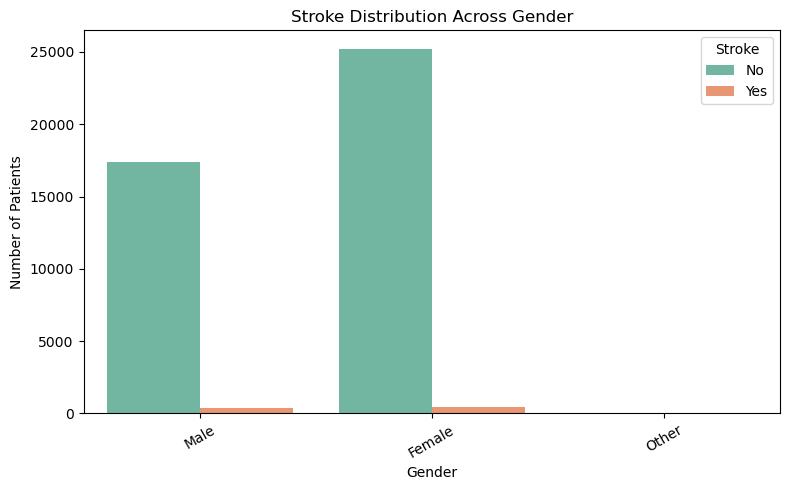

In [45]:
# count the Stroke Distribution Across Gender.
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', hue='stroke', data=df, palette='Set2')
plt.title('Stroke Distribution Across Gender')
plt.xlabel('Gender')
plt.ylabel('count')
plt.legend(title='Stroke')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

#### 
This plot shows that both males and females have a higher count of non-stroke cases compared to stroke cases, indicating strokes are relatively rare in the dataset. The distribution of stroke cases appears similar across male and female genders, suggesting no strong gender-based difference in stroke occurrence. The 'Other' gender category has very few entries, making it statistically insignificant for analysis. 

##### age_group vs stroke

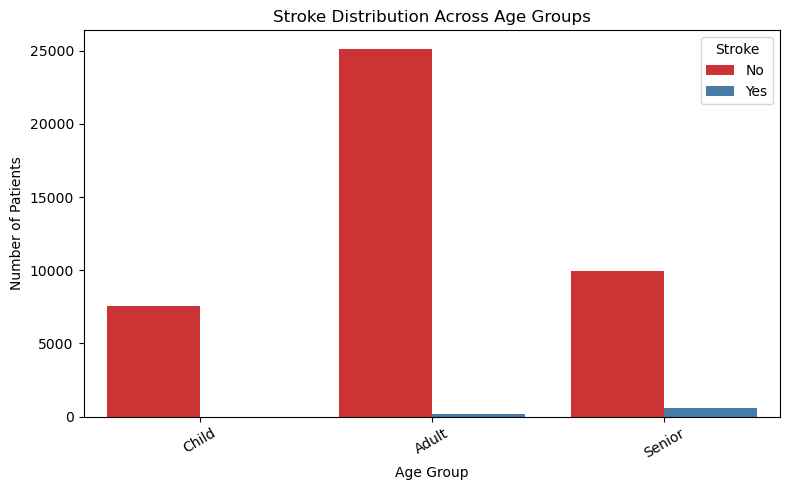

In [46]:
# count the Stroke Distribution Across Age Groups.
plt.figure(figsize=(8, 5))
sns.countplot(x='age_group', hue='stroke', data=df, palette='Set1')
plt.title('Stroke Distribution Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.legend(title='Stroke')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

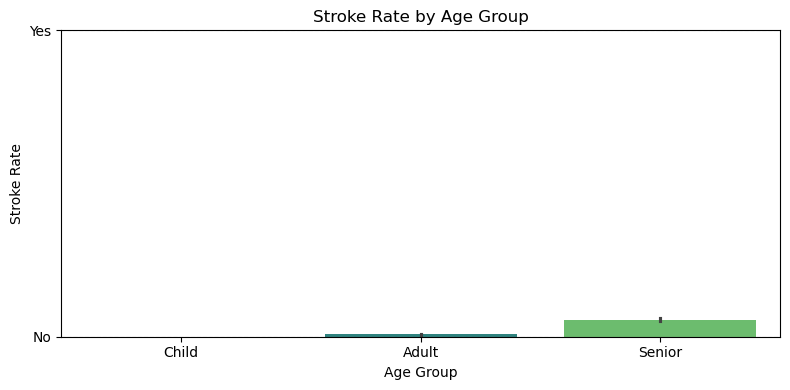

In [48]:
# Stroke rate in each age group
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='age_group', y='stroke', palette='viridis')
plt.title('Stroke Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Stroke Rate')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### hypertension vs stroke

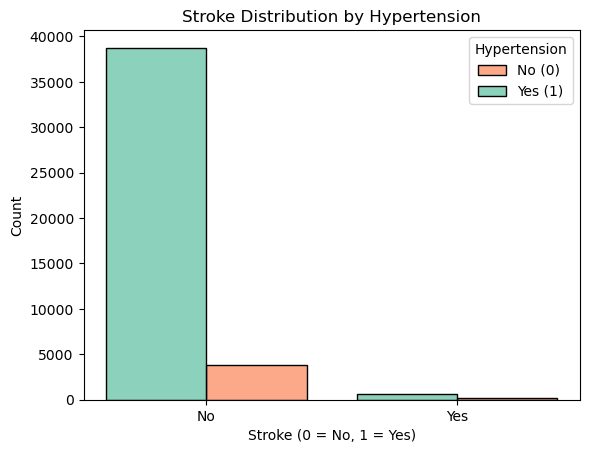

In [49]:
sns.histplot(data=df, x="stroke", hue="hypertension", multiple="dodge", shrink=0.8, palette="Set2", discrete=True)
plt.title("Stroke Distribution by Hypertension")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title="Hypertension", labels=["No (0)", "Yes (1)"])
plt.show()

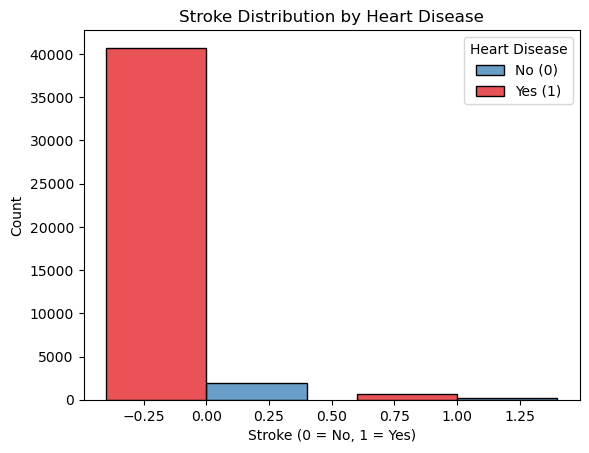

In [4]:
sns.histplot(data=df, x="stroke", hue="heart_disease", multiple="dodge", shrink=0.8, palette="Set1", discrete=True)
plt.title("Stroke Distribution by Heart Disease")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No (0)", "Yes (1)"])
plt.show()

##### work_type vs stroke

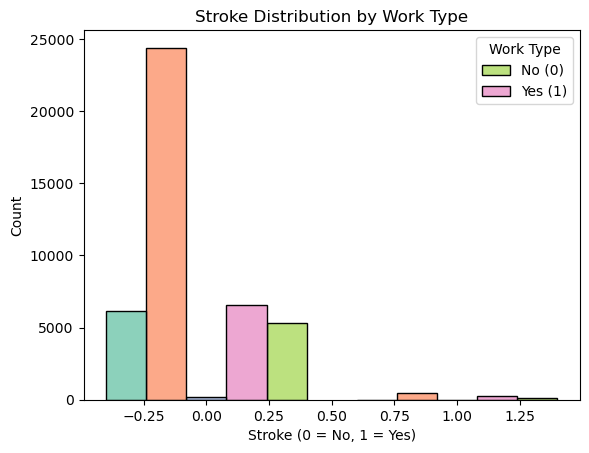

In [5]:
sns.histplot(data=df, x="stroke", hue="work_type", multiple="dodge", shrink=0.8, palette="Set2", discrete=True)
plt.title("Stroke Distribution by Work Type")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title="Work Type", labels=["No (0)", "Yes (1)"])

plt.show()

#### stroke vs Health Risk

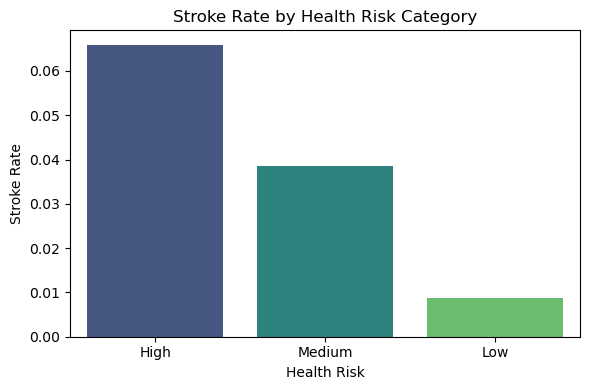

In [29]:
plt.figure(figsize=(6, 4))
sns.barplot(x=health_risk.index, y=health_risk.values, palette='viridis')
plt.title('Stroke Rate by Health Risk Category')
plt.ylabel('Stroke Rate')
plt.xlabel('Health Risk')
plt.tight_layout()
plt.show()

#### 
Stroke rates increase significantly with higher health risk categories. Individuals in the "High" and "Very High" groups are more likely to experience a stroke than those in "Low" or "Medium" risk categories.

In [23]:
health_risk = (
    df.groupby('health_risk')['stroke']
    .mean()
    .sort_values(ascending=False)
)

#### glucose_level_category vs stroke

In [32]:
glucose_level_category = (
    df.groupby('glucose_level_category')['stroke']
    .mean()
    .sort_values(ascending=False)
)

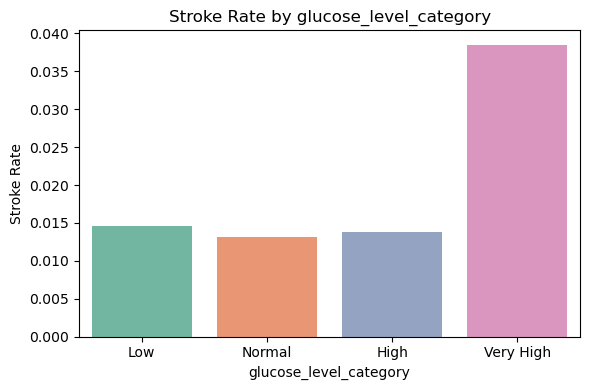

In [42]:
plt.figure(figsize=(6, 4))
sns.barplot(x=glucose_level_category.index, y=glucose_level_category.values, palette='Set2')
plt.title('Stroke Rate by glucose_level_category')
plt.ylabel('Stroke Rate')
plt.xlabel('glucose_level_category')
plt.tight_layout()
plt.show()

#### Average bmi by work type

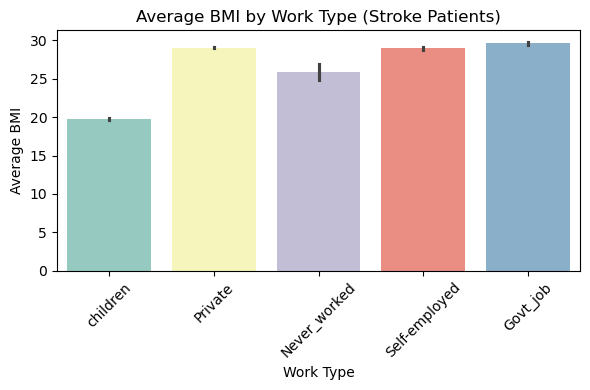

In [72]:
plt.figure(figsize=(6, 4))

# sns.barplot expects x and y to be column names or categorical/numeric arrays
# Since you want average BMI by work_type, set x='work_type', y='bmi', and let seaborn calculate the mean automatically
sns.barplot(x='work_type', y='bmi', data=df, palette='Set3')

plt.title('Average BMI by Work Type (Stroke Patients)')
plt.xlabel('Work Type')
plt.ylabel('Average BMI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# How many people are in each age group?
df['age_group'].value_counts()

age_group
Adult     25348
Senior    10511
Child      7541
Name: count, dtype: int64

In [16]:
# What % of the total each group represents?
df['age_group'].value_counts(normalize=True) * 100

age_group
Adult     58.405530
Senior    24.218894
Child     17.375576
Name: proportion, dtype: float64

In [17]:
# Average BMI and Glucose level by age group
df.groupby('age_group')[['bmi', 'avg_glucose_level']].mean()

,bmi,avg_glucose_level
age_group,,
Adult,30.346887,101.664930
Child,21.002086,92.405794
Senior,29.979284,119.942595


In [18]:
# Crosstab: Age group vs Stroke.
pd.crosstab(df['age_group'], df['stroke'], margins=True)

stroke,0,1,All
age_group,,,
Adult,25146,202,25348
Child,7539,2,7541
Senior,9932,579,10511
All,42617,783,43400


In [19]:
# How many people in each work type?
df['work_type'].value_counts()

work_type
Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: count, dtype: int64

In [73]:
# Average BMI and average glucose level by glucose level category:

df.groupby('glucose_level_category')[['bmi', 'avg_glucose_level']].mean()

,bmi,avg_glucose_level
glucose_level_category,,
Low,27.614930,63.185654
Normal,27.334544,84.578359
High,27.325699,109.071549
Very High,29.625299,155.037790


In [75]:
# Count of people in each health risk category by age group:
df.groupby(['age_group', 'health_risk']).count()

id  gender    age  hypertension  heart_disease  \
age_group health_risk                                                      
Adult     High           634     634    634           634            634   
          Low          22173   22173  22173         22173          22173   
          Medium        2541    2541   2541          2541           2541   
Child     Low           7513    7513   7513          7513           7513   
          Medium          28      28     28            28             28   
Senior    High          3024    3024   3024          3024           3024   
          Low           3480    3480   3480          3480           3480   
          Medium        4007    4007   4007          4007           4007   

                       ever_married  work_type  Residence_type  \
age_group health_risk                                            
Adult     High                  634        634             634   
          Low                 22173      22173           22173   
          Medium               2541       2541            2541   
Child     Low                  7513       7513            7513   
          Medium                 28         28              28   
Senior    High                 3024       3024            3024   
          Low                  3480       3480            3480   
          Medium               4007       4007            4007   

                       avg_glucose_level    bmi  smoking_status  stroke  \
age_group health_risk                                                     
Adult     High                       634    634             634     634   
          Low                      22173  22173           22173   22173   
          Medium                    2541   2541            2541    2541   
Child     Low                       7513   7513            7513    7513   
          Medium                      28     28              28      28   
Senior    High                      3024   3024            3024    3024   
          Low                       3480   3480            3480    3480   
          Medium                    4007   4007            4007    4007   

                       age_months  glucose_level_category  stroke_binary  
age_group health_risk                                                     
Adult     High                634                     634            634  
          Low               22173                   22173          22173  
          Medium             2541                    2541           2541  
Child     Low                7513                    7513           7513  
          Medium               28                      28             28  
Senior    High               3024                    3024           3024  
          Low                3480                    3480           3480  
          Medium             4007                    4007           4007

In [76]:
# Average glucose level by health risk category:
df.groupby('health_risk')['avg_glucose_level'].mean()

health_risk
High      142.414270
Low        91.840212
Medium    113.567291
Name: avg_glucose_level, dtype: float64

In [77]:
# Average BMI by age group and health risk:
df.groupby(['age_group', 'health_risk'])['bmi'].mean()

age_group  health_risk
Adult      High           36.925237
           Low            28.678853
           Medium         35.375403
Child      Low            20.723426
           Medium         35.587500
Senior     High           32.558995
           Low            24.450101
           Medium         29.092513
Name: bmi, dtype: float64

In [78]:
# Average glucose level by age group and glucose level category:
df.groupby(['age_group', 'glucose_level_category'])['avg_glucose_level'].mean()


age_group  glucose_level_category
Adult      Low                        63.159736
           Normal                     84.612091
           High                      109.104234
           Very High                 153.702245
Child      Low                        63.191639
           Normal                     84.423896
           High                      109.223258
           Very High                 143.628731
Senior     Low                        63.252916
           Normal                     84.625737
           High                      108.832245
           Very High                 159.104493
Name: avg_glucose_level, dtype: float64

In [79]:
# Number of people in each glucose level category and health risk:
df.groupby(['glucose_level_category', 'health_risk']).size()


glucose_level_category  health_risk
Low                     High             172
                        Low             5250
                        Medium           760
Normal                  High             536
                        Low            17471
                        Medium          2331
High                    High             246
                        Low             7729
                        Medium          1033
Very High               High            2704
                        Low             2716
                        Medium          2452
dtype: int64

In [81]:
# Stroke count by hypertension:
df.groupby('hypertension')['stroke_binary'].sum()

hypertension
0    583
1    200
Name: stroke_binary, dtype: int64

In [82]:
# Stroke rate by heart disease:
df.groupby('heart_disease')['stroke_binary'].mean()


heart_disease
0    0.014660
1    0.085839
Name: stroke_binary, dtype: float64

In [83]:
# Stroke count by work type:
df.groupby('work_type')['stroke_binary'].sum()

work_type
Govt_job          89
Never_worked       0
Private          441
Self-employed    251
children           2
Name: stroke_binary, dtype: int64

In [84]:
# Stroke count by smoking status:
df.groupby('smoking_status')['stroke_binary'].sum()

smoking_status
formerly smoked    221
never smoked       429
smokes             133
Name: stroke_binary, dtype: int64

In [85]:
# Stroke rate by marital status:
df.groupby('ever_married')['stroke_binary'].mean()

ever_married
No     0.005174
Yes    0.025163
Name: stroke_binary, dtype: float64

In [87]:
# Stroke rate by Residence_type :
df.groupby('Residence_type')['stroke_binary'].sum()

Residence_type
Rural    384
Urban    399
Name: stroke_binary, dtype: int64

#### Data Visualization

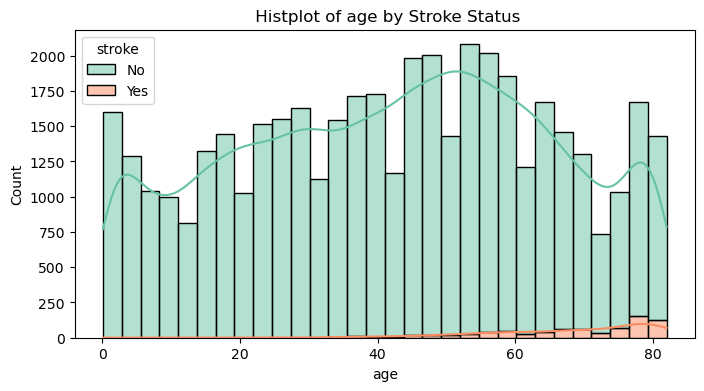

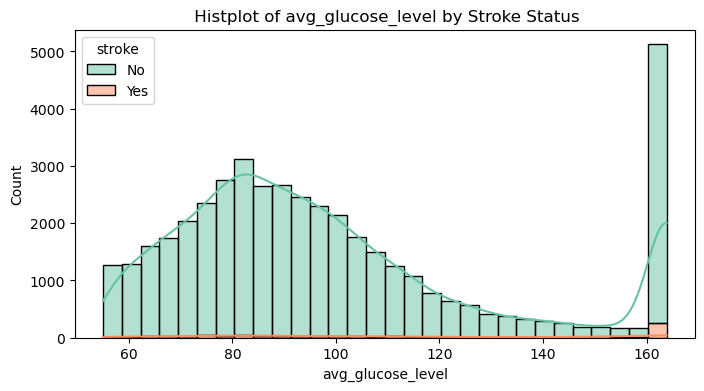

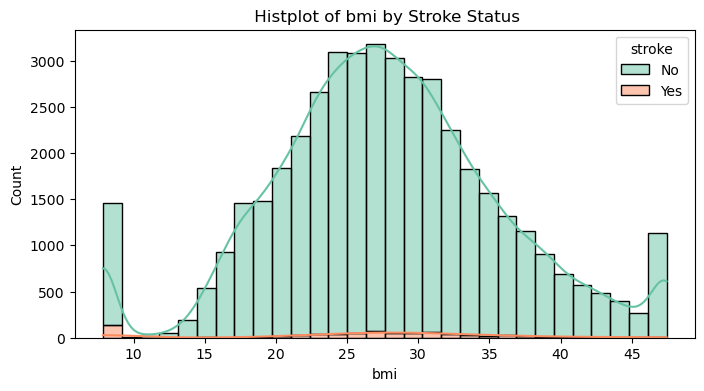

In [89]:
# --- Histplots with stroke hue and bright palette ---
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(
        data=df,
        x=col,
        hue='stroke',
        kde=True,
        multiple='stack',
        bins=30,
        palette='Set2'  # You can try 'Set1', 'husl', 'coolwarm', etc.
    )
    plt.title(f' Histplot of {col} by Stroke Status')
    plt.show()


###
    Age vs Stroke: Stroke cases increase noticeably with age.
    Avg Glucose vs Stroke: Higher glucose levels are more associated with stroke.
    BMI vs Stroke: Stroke patients slightly skew toward higher BMI but not significantly.

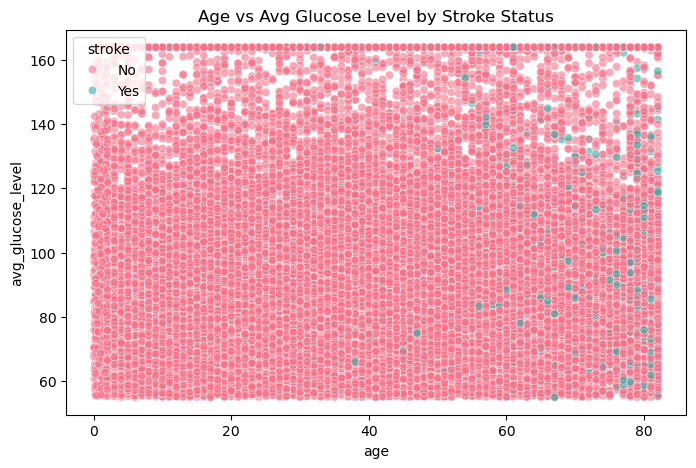

In [93]:
# --- Scatter Plots ---
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='age', y='avg_glucose_level', hue='stroke', alpha=0.6, palette='husl')
plt.title('Age vs Avg Glucose Level by Stroke Status')
plt.show()

### 
  Age vs Avg Glucose: Stroke patients cluster in older age and higher glucose levels.

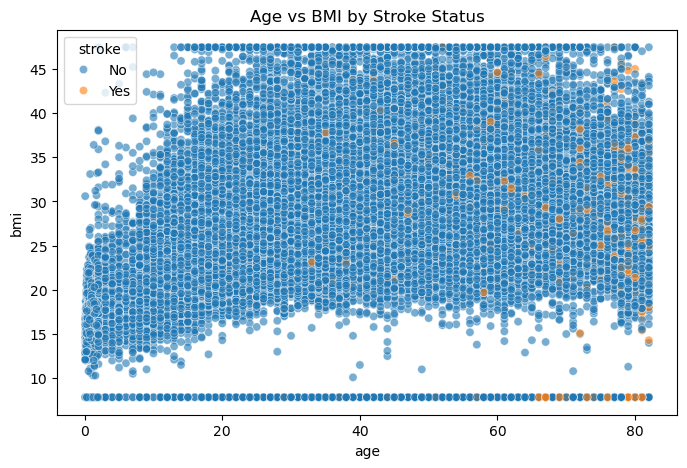

In [94]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='age', y='bmi', hue='stroke', alpha=0.6)
plt.title('Age vs BMI by Stroke Status')
plt.show()

#### 
    Age vs BMI: No clear correlation, but stroke cases are more frequent in older adults.

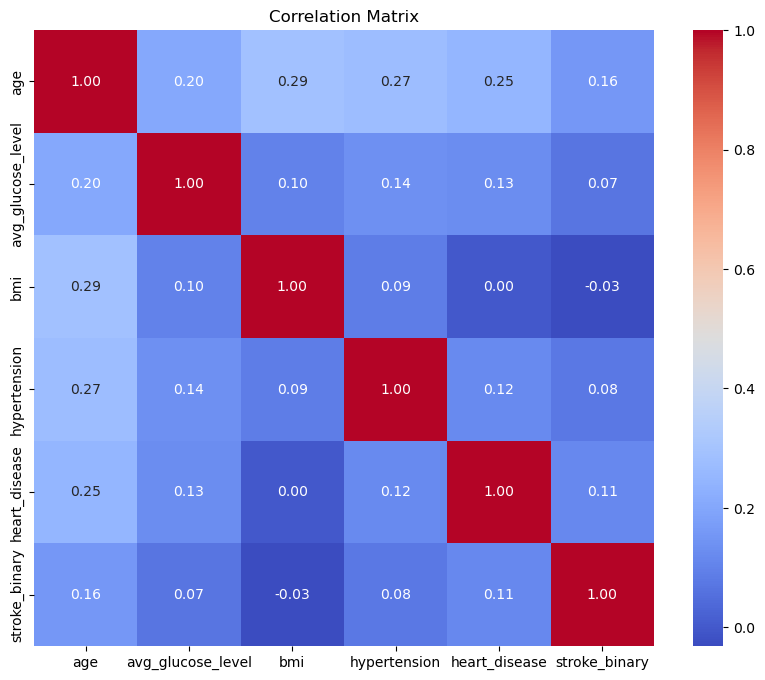

In [96]:
# --- Correlation Matrix ---
plt.figure(figsize=(10, 8))
corr = df[['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke_binary']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

####
Age has the strongest positive correlation with stroke (among numeric features).